# Analysis of Used Car Market

In this analysis, you could explore various aspects of the used car market such as the distribution of car prices, the most popular car makes and models, the average age and mileage of used cars. You could also look at geographic trends by analyzing car sales by location.

By analyzing this data, you can gain insights into the used car market and identify trends and patterns that can help car buyers, sellers, and manufacturers make informed decisions. For example, you could identify which car makes and models hold their value well over time or which features are most in demand among used car buyers.

In [125]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:

conn=mysql.connector.connect(host='localhost', password='#',user='root')
cur=conn.cursor()
cur.execute('CREATE DATABASE IF NOT EXISTS car_sales')
engine = create_engine('mysql+mysqlconnector://root:#@localhost/car_sales', echo=False) 


# reading files

In [8]:

car=pd.read_csv("D:\projects\car sales\data\CAR.csv")

In [9]:
car.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [11]:
# lot of missing values, dtypes are correct

In [12]:
car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


- highest price is 35 million !
- there are cares from year 1988 to present
- there are used and new cars as wel

In [13]:
def print_it_all(df):
    for col in df.columns:
        if len(df[col].unique())<8:
            print(col)
            print(df[col].value_counts())
            print("null:",df[col].isnull().sum())

In [14]:
print_it_all(car)

Transmission
Manual       1133
Automatic     926
Name: Transmission, dtype: int64
null: 0
Owner
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: Owner, dtype: int64
null: 0
Seller Type
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64
null: 0
Drivetrain
FWD    1330
RWD     321
AWD     272
Name: Drivetrain, dtype: int64
null: 136
Seating Capacity
5.0    1615
7.0     273
4.0      42
8.0      35
6.0      23
2.0       7
Name: Seating Capacity, dtype: int64
null: 64


# DATA CLEANING

In [15]:
car.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [16]:
car.dropna(how='all', inplace=True)

In [17]:
car_nulls=car[car.isnull().sum(axis=1) > 2]
car_nulls



,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
33,Honda,CR-V 2.4 AT,860000,2013,67000,Petrol,Automatic,Mumbai,Brown,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Audi,A4 2.0 TDI (143 bhp),1250000,2012,50000,Diesel,Automatic,Mumbai,White,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Mercedes-Benz,GLC 220 d Sport,3900000,2018,83400,Diesel,Automatic,Hyderabad,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Honda,Brio S MT,229000,2013,38175,Petrol,Manual,Kolkata,Blue,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Tata,Nexon EV XZ Plus,1375000,2021,16000,Electric,Automatic,Mumbai,White,First,Individual,NaN,NaN,NaN,FWD,3993.0,1811.0,1606.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,MG,ZS EV Exclusive [2020-2021],2100000,2020,38500,Electric,Automatic,Delhi,Blue,First,Individual,NaN,NaN,NaN,FWD,4314.0,1809.0,1620.0,5.0,NaN
1928,Porsche,Cayenne 3.2 V6 Petrol,3600000,2014,43000,Petrol,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,Maruti Suzuki,Wagon R VXi 1.0 [2019-2019],420000,2018,50000,Petrol,Manual,Bhubaneswar,White,UnRegistered Car,Individual,NaN,NaN,NaN,NaN,3655.0,1620.0,1675.0,5.0,32.0
2009,Audi,A4 2.0 TDI Sline,775000,2012,89000,Diesel,Automatic,Mohali,Black,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# drop rows with more than 1 null value

In [19]:
car.dropna(thresh=19,inplace=True)


In [20]:
car.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain            63
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
dtype: int64

In [21]:
car['Drivetrain'].fillna(car['Drivetrain'].mode()[0],inplace=True)

In [22]:
car['Fuel Tank Capacity']=car['Fuel Tank Capacity'].fillna(car['Fuel Tank Capacity'].median())

In [23]:
# columns are validated and cleaned

# sql

In [51]:
car.to_sql(name='car',con=engine, if_exists='replace', index= False)

1979

In [64]:
# we have done some queries in mysql
# i have saved the sql queries as car_sales in folder.

In [71]:
# connectng to car sales#

In [217]:


conn=mysql.connector.connect(host='localhost', password='6990Mysql#',user='root',db='car_sales')
cur=conn.cursor()

In [233]:
car_df=pd.read_sql('select * from car_df',conn)

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\986645686.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_df=pd.read_sql('select * from car_df',conn)


In [261]:
top_count=pd.read_sql("""
SELECT Make, COUNT(*) as 'NO' FROM car
GROUP BY Make
ORDER BY `NO` DESC
LIMIT 10;""",conn)
top_count
# Maruti has most cars

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\3829218776.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_count=pd.read_sql("""


,Make,NO
0,Maruti Suzuki,426
1,Hyundai,342
2,Mercedes-Benz,163
3,Honda,150
4,Toyota,130
5,BMW,119
6,Audi,119
7,Mahindra,118
8,Tata,51
9,Ford,48


In [290]:
top_model=pd.read_sql("""
SELECT Make,  Model,Price
FROM car
ORDER BY Price DESC
limit 10;""",conn)
top_model
# Ferrarri has highest price of 35M

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\3463788723.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_model=pd.read_sql("""


,Make,Model,Price
0,Ferrari,488 GTB,35000000
1,Land Rover,Range Rover 3.0 V6 Diesel Vogue LWB,27500000
2,Lamborghini,Huracan LP 610-4,24000000
3,Land Rover,Range Rover 3.0 V6 Diesel Vogue,22000000
4,Rolls-Royce,Ghost Extended Wheelbase,20000000
5,Rolls-Royce,Ghost Extended Wheelbase,20000000
6,Mercedes-Benz,S-Class S 450,20000000
7,Land Rover,Range Rover 3.0 V6 Diesel Vogue,19300000
8,Mercedes-Benz,S-Class S 350D [2018-2020],18500000
9,Mercedes-Benz,S-Class Maybach S 560,18500000


In [236]:
pd.read_sql("""
SELECT Make, Price, `Seating Capacity`
FROM car
WHERE `Seating Capacity` = 2;""",conn)

# 7 high end sports cars

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\2017558131.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""


,Make,Price,Seating Capacity
0,Mercedes-Benz,2400000,2.0
1,Audi,4000000,2.0
2,Porsche,9000000,2.0
3,Ferrari,35000000,2.0
4,Lamborghini,24000000,2.0
5,Porsche,9500000,2.0
6,Porsche,10900000,2.0


In [324]:
color_dist=pd.read_sql("""SELECT `Color`,COUNT(*) as count
FROM car
GROUP BY `Color`
ORDER BY COUNT(*);""",conn )
color_dist
# white colored cars are the most!

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\1542163763.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  color_dist=pd.read_sql("""SELECT `Color`,COUNT(*) as count


,Color,count
0,Pink,1
1,Purple,4
2,Beige,6
3,Yellow,7
4,Others,11
5,Green,15
6,Orange,16
7,Bronze,27
8,Gold,30
9,Maroon,34


In [239]:
car_df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.916000e+03,1916.000000,1.916000e+03,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000
mean,1.757747e+06,2016.695198,5.344584e+04,4291.105950,1771.723382,1590.055324,5.301148,51.839927
std,2.475984e+06,3.125236,5.840476e+04,438.646151,133.699444,136.175843,0.816039,15.210491
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,5.107498e+05,2015.000000,2.805925e+04,3990.000000,1695.000000,1485.000000,5.000000,40.000000
50%,8.525000e+05,2017.000000,4.900000e+04,4370.000000,1775.000000,1544.000000,5.000000,48.000000
75%,1.975000e+06,2019.000000,7.123075e+04,4633.000000,1835.000000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [240]:
#creating price category
car_df=pd.read_sql("""
SELECT *,
          CASE
              WHEN Price > 1.975000e+06 THEN 'Elite'
              WHEN Price > 8.525000e+05 THEN 'Expensive'
              WHEN Price > 5.107498e+05 THEN 'Moderate'
              ELSE 'Cheap'
          END AS price_category
FROM car;""",conn)

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_10764\2189357869.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_df=pd.read_sql("""


In [241]:
car_df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'price_category'],
      dtype='object')

In [242]:
#we dont need these columns

In [ ]:
car_df.drop(columns=['Length','Width','Height','ID'],inplace=True)

In [244]:

car_df['Engine'] = car_df['Engine'].str.replace(' cc', '').astype(int).rename('engine_cc')
car_df = car_df.rename(columns={'Engine': 'engine_cc'})

In [245]:
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,engine_cc,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,Cheap
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,Cheap
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,Cheap
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,Moderate
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,Expensive


# Visualizations

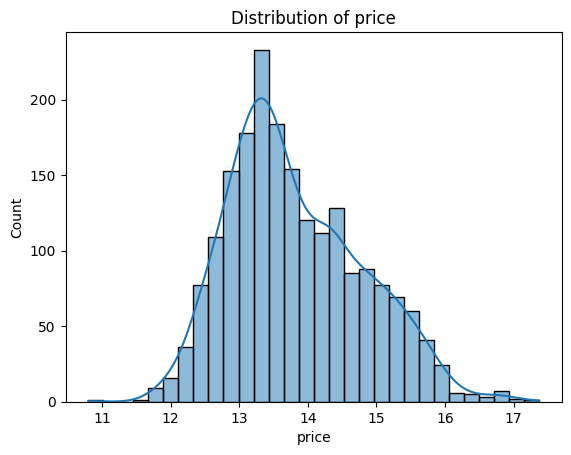

In [246]:
sns.histplot(np.log(car_df['Price']),kde=True,bins=30)
plt.xlabel('price')
plt.title('Distribution of price')
plt.show()

In [247]:
# SLIGHTLY RIGHT SKEWED

price_category analysis

In [248]:
car_cat=car_df.groupby(['Make','price_category',]).size().unstack(fill_value=0)

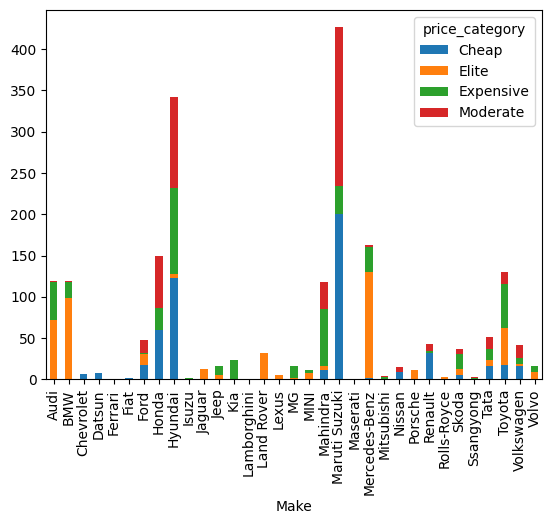

In [249]:

car_cat.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

- We can clearly see that Maruti has highest count and they provide moderate and cheap price range
- the second count goes to hyundai, but their categories are most cheap, moderate and expensive.
- BENZ,BMW,AUDI provides mostly elite and expensive cars and also has noticeable count.


In [250]:
car_df.Make.nunique()

33

In [251]:
car_df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type',
       'engine_cc', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width',
       'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'price_category'],
      dtype='object')

Text(0.5, 1.0, 'yearly distribution')

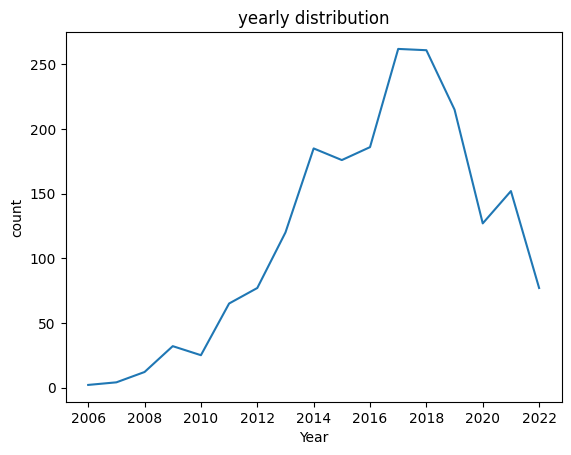

In [252]:
yearly_price=car_df.groupby(car_df.Year[car_df['Year']>=2005]).size().reset_index(name='count')
sns.lineplot(x=yearly_price.Year,y=yearly_price['count'])
plt.title('yearly distribution')

In [253]:
# most cars are around 2018

<AxesSubplot: xlabel='price_category', ylabel='Price'>

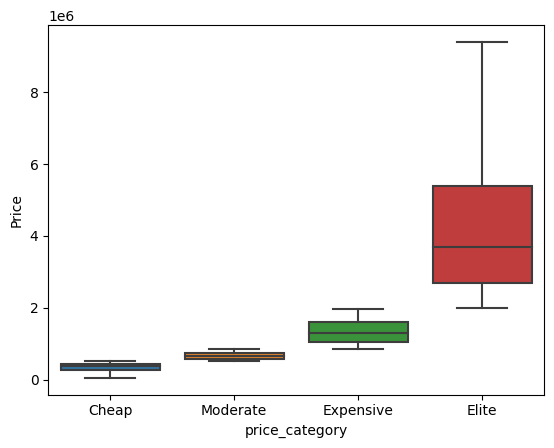

In [254]:
sns.boxplot(x='price_category',y='Price',data=car_df,sym='')

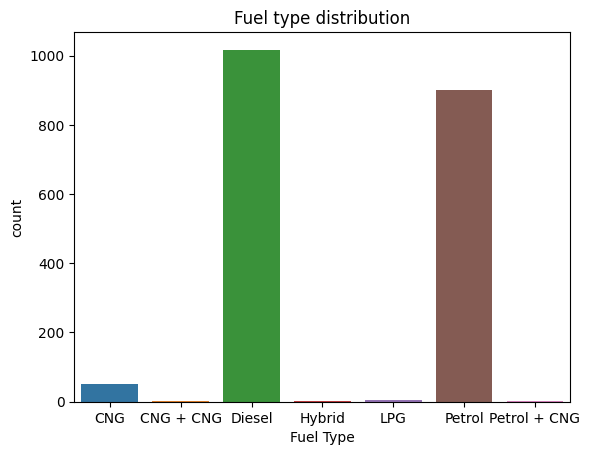

In [350]:
fueltype_count=car_df.groupby('Fuel Type').size().reset_index(name='count')
sns.barplot(x=fueltype_count['Fuel Type'],y=fueltype_count['count'])
plt.title('Fuel type distribution')
plt.show()

Text(0.5, 1.0, 'Fuel type and average price')

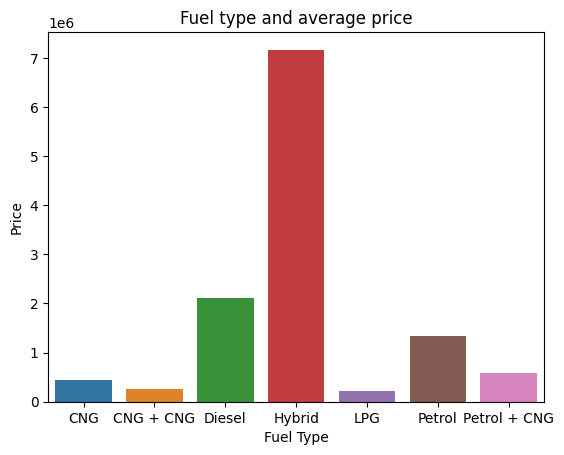

In [343]:
avg_price_fueltype=car_df.groupby('Fuel Type').Price.mean().reset_index()
sns.barplot(x=avg_price_fueltype['Fuel Type'],y=avg_price_fueltype['Price'])
plt.title('Fuel type and average price')

Text(0.5, 1.0, 'power and price')

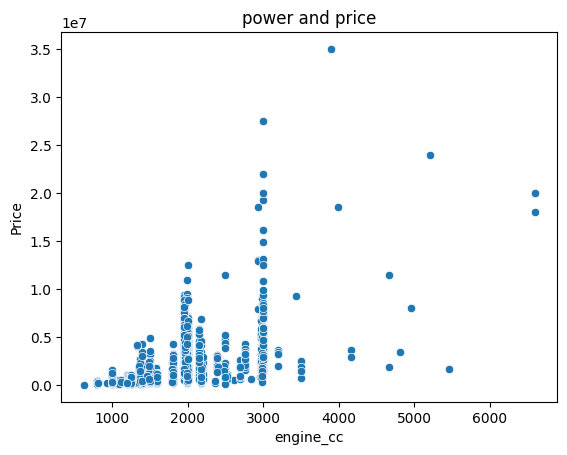

In [257]:
sns.scatterplot(x='engine_cc',y='Price',data=car_df)
plt.title('power and price')

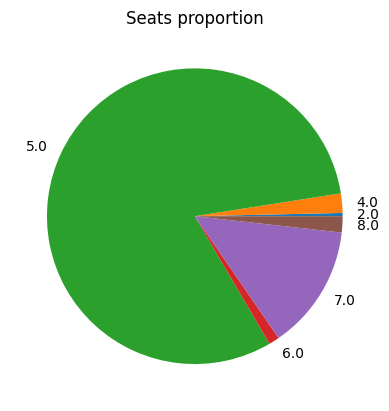

In [342]:
Seat_dist=car_df.groupby('Seating Capacity').size().reset_index(name='count')
plt.pie(Seat_dist['count'],labels=Seat_dist['Seating Capacity'])
plt.title('Seats proportion')
plt.show()

In [ ]:
# as we guessed the most models are with  seats, and least are with 2 its obviously a sports car

Most cars brands

Text(0.5, 1.0, 'Which brand has the most cars?')

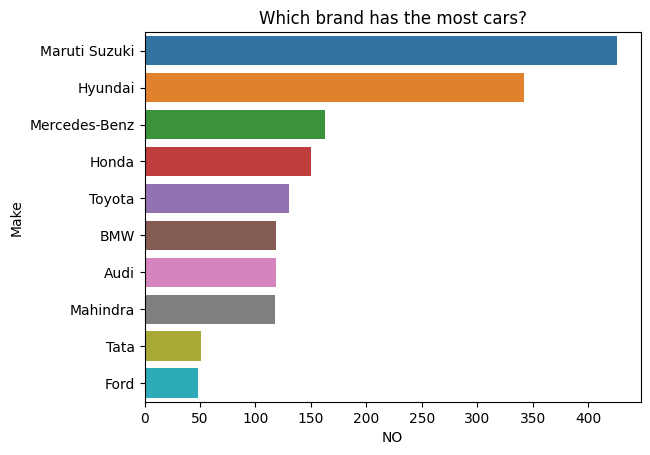

In [348]:
sns.barplot(y=top_count.Make,x=top_count.NO)
plt.title('Which brand has the most cars?')

In [322]:
# Ferrari is our highest rated car

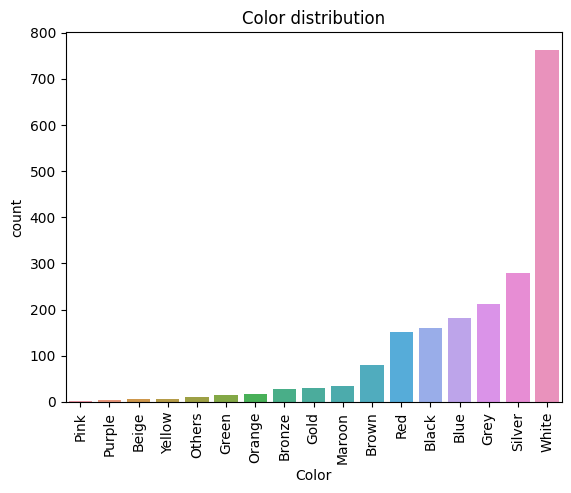

In [347]:
sns.barplot(x='Color',y='count', data= color_dist)
plt.xticks(rotation=90)
plt.title('Color distribution')
plt.show()

In [328]:
# i get it the white being first but second is silver?

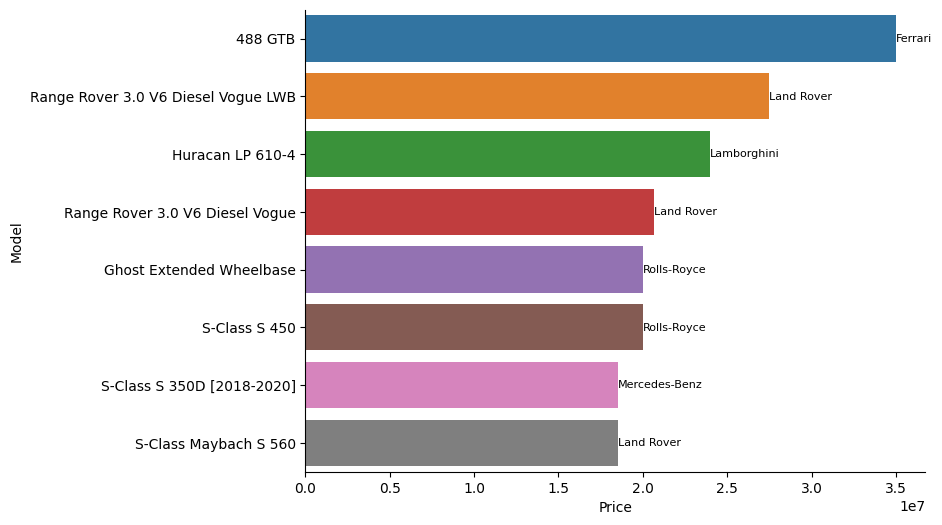

In [ ]:
# top 10 rated cars
plt.figure(figsize=[8,6])
ax = sns.barplot(x='Price', y='Model', data=top_model, orient='h',errorbar=None)

# iterate over the bars and add the make name as text on top of each bar
for i, bar in enumerate(ax.containers[0]):
    make = top_model.iloc[i]['Make']
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, make, ha='left', va='center', fontsize=8)
sns.despine(ax=ax, top=True)
plt.show()


In [346]:
# ferrari 488 GTB is our top rated model